# Convolutional Neural Network


In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

In [2]:
import numpy

### Importing the libraries

In [3]:
tf.__version__

'2.16.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/home/kushagra/Documents/code/AI/hack_project/ArsenicSkinImageBD',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
indices=training_set.class_indices
indices

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/home/kushagra/Documents/code/AI/hack_project/ArsenicSkinImageBD'

### Preprocessing the Test set

## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

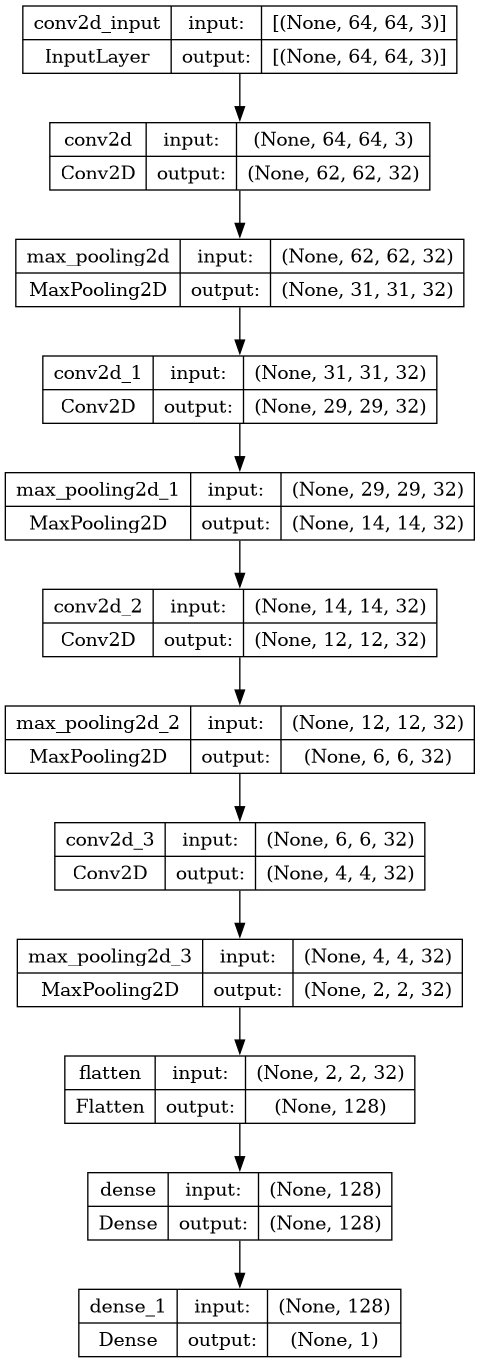

In [14]:
plot_model(model=cnn, show_shapes=True)

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
cnn.fit(x = training_set, validation_data = training_set, epochs = 25)

Epoch 1/25
90/90 [==============================] - 618s 7s/step - loss: 0.3808 - accuracy: 0.8264 - val_loss: 0.2666 - val_accuracy: 0.8992
Epoch 2/25
90/90 [==============================] - 563s 6s/step - loss: 0.1872 - accuracy: 0.9303 - val_loss: 0.1461 - val_accuracy: 0.9470
Epoch 3/25
90/90 [==============================] - 717s 8s/step - loss: 0.1595 - accuracy: 0.9432 - val_loss: 0.1033 - val_accuracy: 0.9603
Epoch 4/25
90/90 [==============================] - 586s 7s/step - loss: 0.1217 - accuracy: 0.9554 - val_loss: 0.1198 - val_accuracy: 0.9568
Epoch 5/25
90/90 [==============================] - 601s 7s/step - loss: 0.1006 - accuracy: 0.9627 - val_loss: 0.0852 - val_accuracy: 0.9700
Epoch 6/25
90/90 [==============================] - 590s 7s/step - loss: 0.1106 - accuracy: 0.9582 - val_loss: 0.1116 - val_accuracy: 0.9599
Epoch 7/25
90/90 [==============================] - 605s 7s/step - loss: 0.0875 - accuracy: 0.9683 - val_loss: 0.1138 - val_accuracy: 0.9519
Epoch 8/25
90

In [16]:
import joblib
joblib.dump(cnn, 'cnn_model.pkl')

['cnn_model.pkl']

## Making a single prediction

In [23]:
import numpy as np
from PIL import Image

image_path = "/home/kushagra/Documents/code/AI/hack_project/ArsenicSkinImageBD/augumented_not_infected/IMG_20230612_125907_aug_0.png"

image = Image.open(image_path)


image = image.resize((64, 64))

image_array = np.array(image)

image_array = np.expand_dims(image_array, axis=0)
result = cnn.predict(image_array)
training_set.class_indices
if result[0][0] == 0:
  prediction = 'not infected'
else:
  prediction = 'infected'

1/1 [==============================] - 0s 16ms/step


In [24]:
print(result)

[[0.]]


In [ ]:
print(prediction)

not infected
